<a href="https://colab.research.google.com/github/konerjonlar/ml-bootcamp-medical-cost/blob/main/notebooks/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Required Libraries

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Perform An Exploratory Data Analysis

In [84]:
# Load dataset
df = pd.read_csv('insurance.csv')

# Display general information about the dataset
print("Display Columns:", df.columns,
      "\nData Size:", df.shape,
      "\nData Types:", df.dtypes,
      "\nFirst 10 Rows:", df.head(10),
      "\nLast 4 Rows:", df.tail(4),
      "\nTotal Null Values:", df.isnull().sum().sum(),
      "\nGeneral Statistics:", df.describe(), sep="\n")

# Check Categorical Variables
categorical_vars = ["children", "smoker", "region"]
for var in categorical_vars:
    print(f"\n{var.capitalize()} Value Counts:\n", df[var].value_counts())


Display Columns:
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Data Size:
(1338, 7)

Data Types:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

First 10 Rows:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest

In [85]:
# Set the threshold values for categorical columns
cat_threshold = 10
car_threshold = 20

# Identify Categorical Columns
categorical_columns = [col for col in df.columns if df[col].dtypes == "O"]

# Identify Numeric Columns that Behave Like Categorical
num_but_categorical = [col for col in df.columns if df[col].nunique() < cat_threshold and df[col].dtypes != "O"]

# Identify Categorical Columns that Behave Like Numeric
categorical_but_cardinal = [col for col in df.columns if df[col].nunique() > car_threshold and df[col].dtypes == "O"]

# Combine the lists of categorical columns
categorical_columns = categorical_columns + num_but_categorical

# Remove columns that behave like cardinal categorical columns
categorical_columns = [col for col in categorical_columns if col not in categorical_but_cardinal]

# Identify Numeric Columns
numeric_columns = [col for col in df.columns if df[col].dtypes != "O"]

# Remove columns that behave like numeric but categorical
numeric_columns = [col for col in numeric_columns if col not in num_but_categorical]

# Print Summary Information
print(f"Observations: {df.shape[0]}")
print(f"Variables: {df.shape[1]}")
print(f"Categorical Columns: {len(categorical_columns)}")
print(f"Numeric Columns: {len(numeric_columns)}")
print(f"Categorical Variables that Behave Like Numeric: {len(num_but_categorical)}")
print(f"Numeric Variables that Behave Like Categorical: {len(categorical_but_cardinal)}")


Observations: 1338
Variables: 7
Categorical Columns: 4
Numeric Columns: 3
Categorical Variables that Behave Like Numeric: 1
Numeric Variables that Behave Like Categorical: 0


# Data Visualization


**Examine the distribution of Bmi (Body Mass Index)**


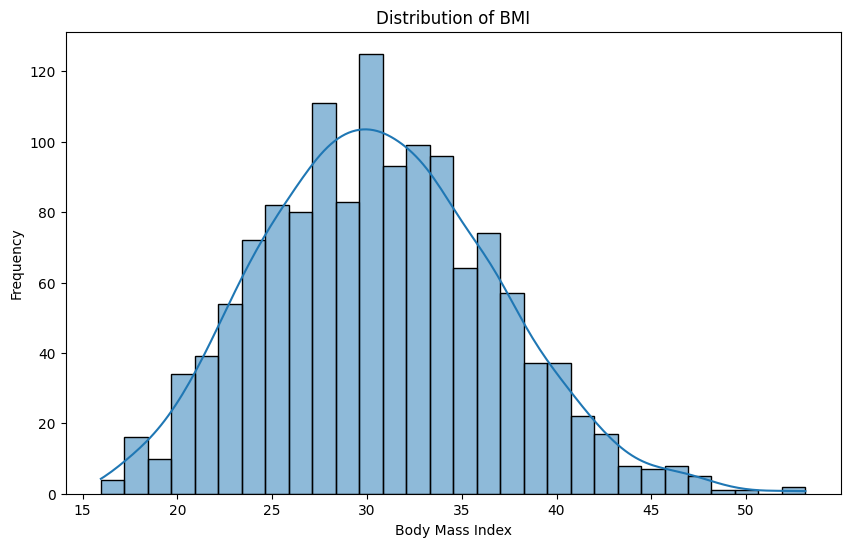

In [86]:
plt.figure(figsize=(10, 6))
sns.histplot(df['bmi'], bins=30, kde=True)
plt.title('Distribution of BMI')
plt.xlabel('Body Mass Index')
plt.ylabel('Frequency')
plt.show()


- The data follows a normal distribution.
- Mod is 30.


**Examine the relationship between “smoker” and “charges”**

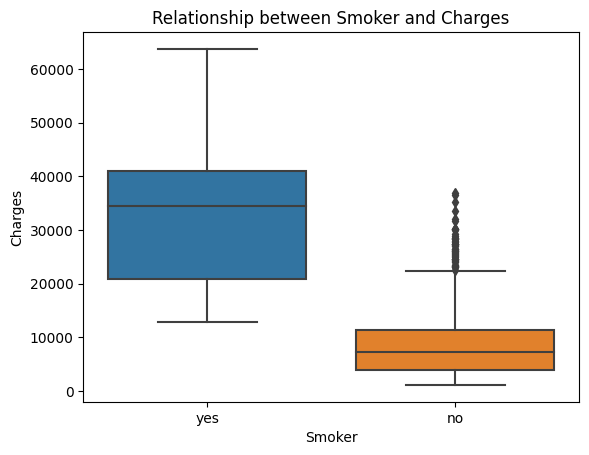

In [87]:
# Examine the relationship between "smoker" and "charges"
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Relationship between Smoker and Charges')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()


As evident from the graph, medical expenses of non-smokers are lower compared to smokers. Smokers tend to have higher medical expenses, indicating that smoking might lead to more frequent medical visits.


**Examine the relationship between “smoker” and “region”.**


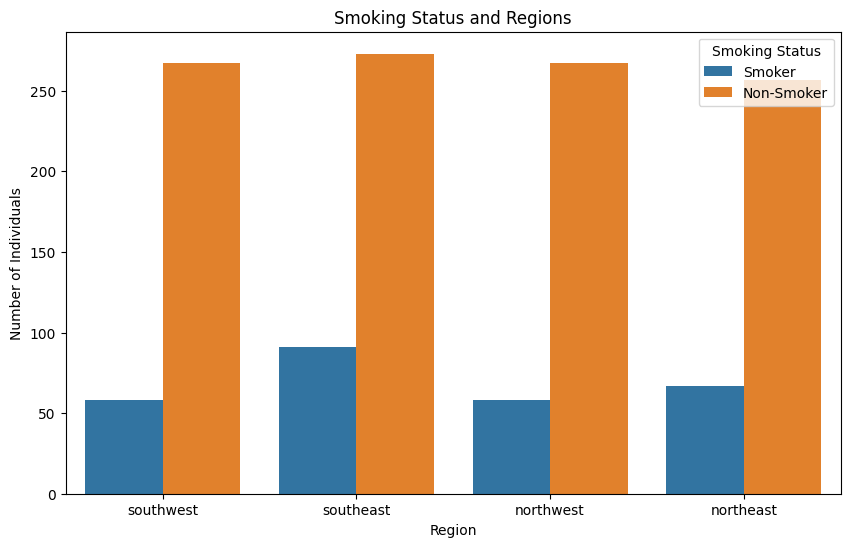

In [88]:
# Define a custom palette for 'yes' (smoker) and 'no' (non-smoker)

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='region', hue='smoker')
plt.title('Smoking Status and Regions')
plt.xlabel('Region')
plt.ylabel('Number of Individuals')
plt.legend(title='Smoking Status', labels=['Smoker', 'Non-Smoker'])
plt.show()


- The total number of non-smokers is higher than smokers.
- Smokers are more represented in the southeast region.


**Examine the relationship between “bmi” and “sex”.**


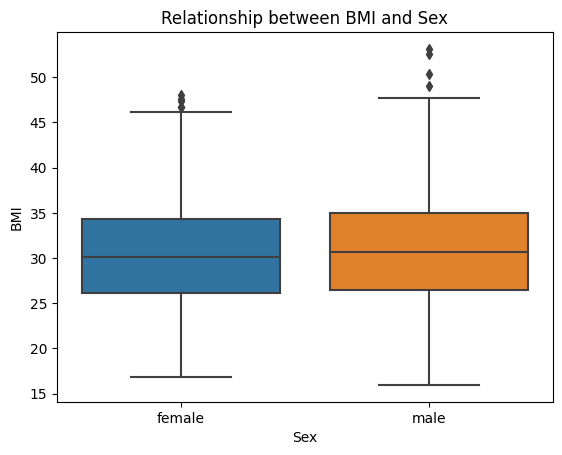

In [89]:
# Examine the relationship between "bmi" and "sex"
sns.boxplot(x='sex', y='bmi', data=df)
plt.title('Relationship between BMI and Sex')
plt.xlabel('Sex')
plt.ylabel('BMI')
plt.show()


Upon inspecting the graph, we observe that the average BMI values of males and females are quite similar, with slightly higher average BMI for males. Additionally, the range of BMI values for males is wider than females.


**Find the "region" with the most "children".**


In [90]:
# Find the "region" with the most "children"
most_children_region = df.groupby('region')['children'].sum().idxmax()
print('Region with Most Children:', most_children_region)


Region with Most Children: southeast


**Examine the relationship between “age” and “bmi”.**


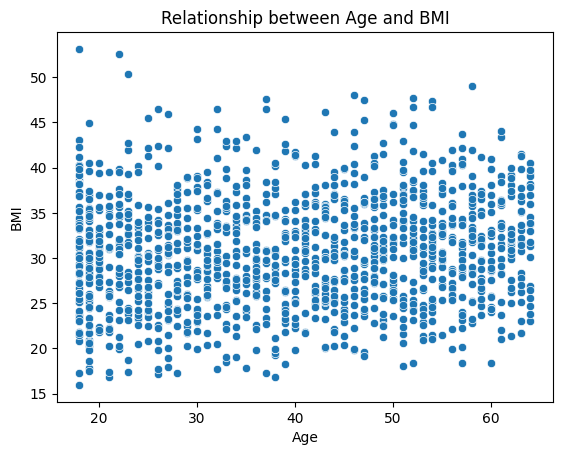

In [91]:
# Examine the relationship between "age" and "bmi"
sns.scatterplot(x='age', y='bmi', data=df)
plt.title('Relationship between Age and BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()


Upon analyzing the relationship between age and BMI, we can conclude that there is no significant correlation between these two variables.



**Examine the relationship between “bmi” and “children”.**


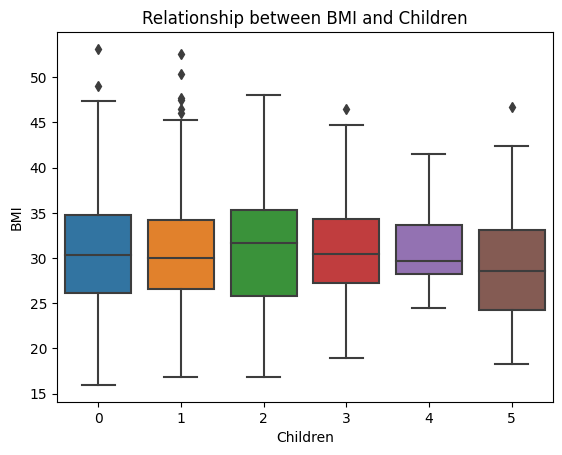

In [92]:
# Examine the relationship between "bmi" and "children"
sns.boxplot(x='children', y='bmi', data=df)
plt.title('Relationship between BMI and Children')
plt.xlabel('Children')
plt.ylabel('BMI')
plt.show()


- There is no correlation between the number of children and bmi
- There is an outlier in groups with 0,1,3,5 children



**Is there an outlier in the "bmi" variable? Please review.**

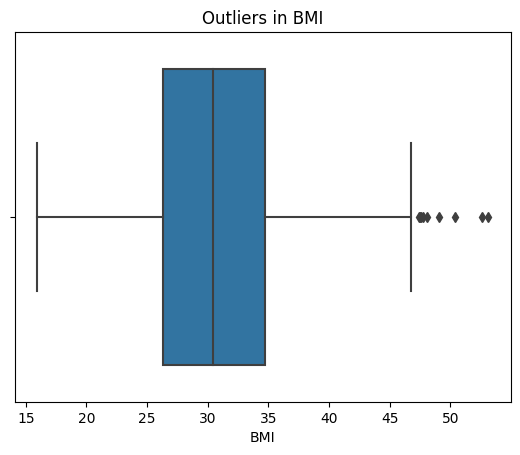

In [93]:
# Check for outliers in the "bmi" variable
sns.boxplot(x=df['bmi'])
plt.title('Outliers in BMI')
plt.xlabel('BMI')
plt.show()


Upon inspecting the box plot, we can observe the presence of an outlier at the upper bound of the BMI values.



**Examine the relationship between “bmi” and “charges”.**


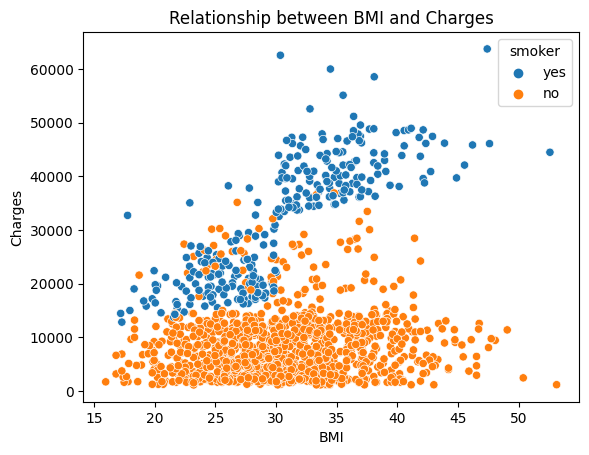

In [94]:
# Examine the relationship between "bmi" and "charges"
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df)
plt.title('Relationship between BMI and Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()


- No correlation between BMI and medical expenses

- Smokers spend more than non-smokers.



**Examine the relationship between “region”, “smoker” and “bmi” using bar**

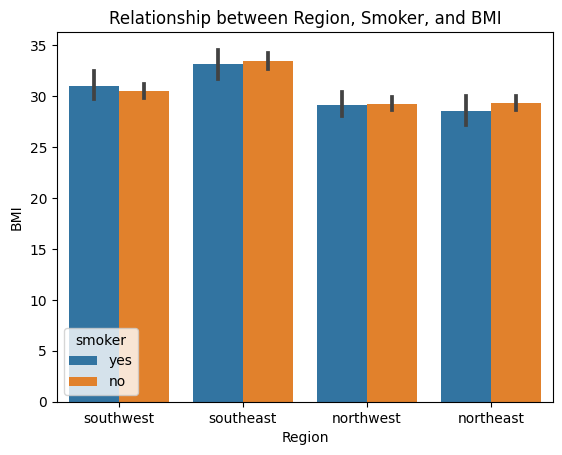

In [95]:
# Examine the relationship between "region", "smoker", and "bmi" using bar plot
sns.barplot(x='region', y='bmi', hue='smoker', data=df)
plt.title('Relationship between Region, Smoker, and BMI')
plt.xlabel('Region')
plt.ylabel('BMI')
plt.show()


**Southeast region body mass index (BMI) is more durable than other devices**



# Data Preprocessing

In [96]:
# Determine Outlier Columns
outlier_columns = ['age', 'bmi', 'charges']

# Define Outlier Criteria and IQR Factor
outlier_factor = 1.5

for col in outlier_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - outlier_factor * IQR
    upper_bound = Q3 + outlier_factor * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


In [97]:
df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [98]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Make a copy of the dataframe to avoid modifying the original data
df_encoded = df.copy()

# Apply Label Encoding to 'sex' and 'smoker' columns
label_encoder = LabelEncoder()
df_encoded['sex'] = label_encoder.fit_transform(df_encoded['sex'])
df_encoded['smoker'] = label_encoder.fit_transform(df_encoded['smoker'])

# Apply One-Hot Encoding to the 'region' column
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_region = onehot_encoder.fit_transform(df_encoded[['region']])
encoded_region_df = pd.DataFrame(encoded_region, columns=onehot_encoder.get_feature_names_out(['region']))
df_encoded = pd.concat([df_encoded, encoded_region_df], axis=1)
df_encoded.drop(['region'], axis=1, inplace=True)

# Separate independent variables (X) and dependent variable (y)
X = df_encoded.drop(['charges'], axis=1)
y = df_encoded['charges']

# Drop rows with NaN values
X.dropna(inplace=True)
y = y[X.index]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data using Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Model Selection

In [99]:
# Create dictionary of models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Support Vector Regressor': SVR()
}

# Perform cross-validation and evaluate models using Mean Squared Error (MSE)
results = {}
for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', error_score='raise')
    rmse_scores = np.sqrt(-scores)
    results[model_name] = rmse_scores.mean()

# Find the best performing model
best_model = min(results, key=results.get)
best_rmse = results[best_model]

print("Model Performances:")
for model_name, rmse_score in results.items():
    print(f"{model_name}: RMSE = {rmse_score:.2f}")

print(f"Best Performing Model: {best_model} (RMSE = {best_rmse:.2f})")


Model Performances:
Linear Regression: RMSE = 4528.64
Random Forest Regressor: RMSE = 4775.72
Support Vector Regressor: RMSE = 7203.83
Best Performing Model: Linear Regression (RMSE = 4528.64)


In [100]:
# Perform cross-validation and evaluate models using Mean Squared Error (MSE)
results = {}
for model_name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error', error_score='raise')
    rmse_scores = np.sqrt(-scores)
    results[model_name] = rmse_scores.mean()

# Find the best performing model
best_model = min(results, key=results.get)
best_rmse = results[best_model]

print("Model Performances:")
for model_name, rmse_score in results.items():
    print(f"{model_name}: RMSE = {rmse_score:.2f}")

print(f"Best Performing Model: {best_model} (RMSE = {best_rmse:.2f})")


Model Performances:
Linear Regression: RMSE = 4528.64
Random Forest Regressor: RMSE = 4770.15
Support Vector Regressor: RMSE = 7212.91
Best Performing Model: Linear Regression (RMSE = 4528.64)


# Hyper-parameter Optimization

In [101]:
# Lineer Regresyon modelini oluşturma
model = LinearRegression()

# Hiperparametreler ve değer aralıkları
param_grid = {
    # Lineer Regresyon modeli için herhangi bir hiperparametre bulunmuyor
}

# Grid Search ile hiperparametre optimizasyonu
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

# En iyi modeli seçme
best_model = grid_search.best_estimator_

# Test verisi üzerinde tahmin yapma
y_pred = best_model.predict(X_test)

# RMSE hesaplama
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test RMSE:", rmse)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
Test RMSE: 4788.476339050994


# Model Evaluation

In [115]:
# Select the best model
best_model = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_model.predict(X_test_scaled)

# Calculate error metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the results
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')


Mean Squared Error (MSE): 22929505.65
Mean Absolute Error (MAE): 2726.92
Root Mean Squared Error (RMSE): 4788.48


In [114]:
# Possible hyperparameters to consider
param_grid = {
    'fit_intercept': [True],
}

# Perform Grid Search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Get the best model and its results
best_model = grid_search.best_estimator_
best_rmse = np.sqrt(-grid_search.best_score_)

print("Best Parameters:", grid_search.best_params_)
print("Best RMSE:", best_rmse)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END .................................fit_intercept=True; total time=   0.0s
Best Parameters: {'fit_intercept': True}
Best RMSE: 4535.239214517933
